In [1]:
import lucem_illud as lucem_illud_2020 #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [5]:
cd ..

/Users/lilygrier/git/ContentAnalysisPresidentialRhetoric


In [6]:
from utils.utils import *
from topic_modeling.PrepareText import PrepareText


In [7]:

import lucem_illud 
from utils.utils import *
from topic_modeling.TopicModeling import TopicModels as LDA_barrosoluquer
from topic_modeling.PrepareText import PrepareText
%load_ext autoreload
%autoreload 2

import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import gensim
import numpy as np 
import pandas as pandas
import matplotlib.pyplot as plt 
import matplotlib.cm 
import seaborn as sns

%matplotlib inline

import itertools
import re
import json

In [14]:
ls

full_exec_orders_text.csv   presidential_speeches.xlsx


In [16]:
filepath = '../data/full_exec_orders_text.csv'

In [17]:
pd.read_csv(filepath)

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [20]:
exec_orders = pd.read_csv(filepath)

In [21]:
exec_orders

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [22]:
targetDF = exec_orders
textColumn = 'order_text'
numCategories = 5
numClusters = 5

In [23]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.4, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 council
 committee
 health
 board
 commission
 service
 advisory
 defense
 programs
 report


Cluster 1:
 register
 presidential
 documents
 page
 volume
 1996
 1997
 1998
 1995
 tuesday


Cluster 2:
 property
 blocked
 interests
 ieepa
 persons
 treasury
 50
 emergency
 entity
 iran


Cluster 3:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 judges


Cluster 4:
 task
 force
 attorney
 chair
 health
 development
 environmental
 recommendations
 report
 local




In [24]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.138
Completeness: 0.208
V-measure: 0.166
Adjusted Rand Score: 0.068


In [25]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.3, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 register
 documents
 page
 volume
 1997
 1996
 1998
 1995
 tuesday
 97


Cluster 1:
 property
 blocked
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity
 iran


Cluster 2:
 december
 board
 inserting
 striking
 2001
 emergency
 assistant
 succession
 2003
 immunities


Cluster 3:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 37


Cluster 4:
 task
 committee
 force
 commission
 advisory
 programs
 american
 education
 local
 chair




In [26]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.174
Completeness: 0.201
V-measure: 0.187
Adjusted Rand Score: 0.093


In [27]:
# perform PCA and visualize
PCA = sklearn.decomposition.PCA(n_components = 2).fit(TFVects.toarray())
reducedPCA_data = PCA.transform(TFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in KM.labels_]

In [28]:
components = PCA.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [29]:
colordict = {
'barack_obama': 'red',
'george_w_bush': 'orange',
'william_j_clinton': 'green',
'donald_trump': 'blue',
'joe_biden': 'purple'
    }
colors = [colordict[c] for c in exec_orders['president']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('barack_obama', 'red'), ('george_w_bush', 'orange'), ('william_j_clinton', 'green'), ('donald_trump', 'blue'), ('joe_biden', 'purple')])


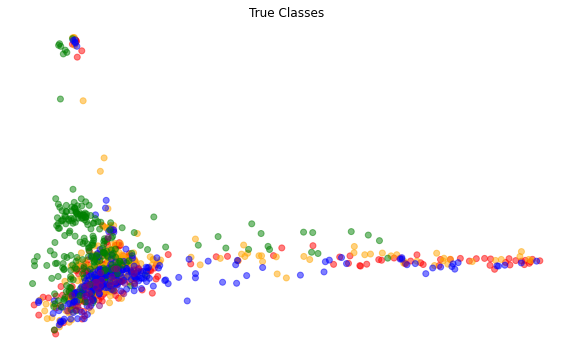

In [30]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [31]:
re.match(r'Sec. d+.', ' purposes.\n“(vii) ensure t')

In [32]:
re.search(r'\([xiv]+\)', ' purposes.\n“(vii) ensure t')

<re.Match object; span=(12, 17), match='(vii)'>

In [33]:
text = 'ollows:\n\n“Sec. 2.2. Reciprocity. Except as otherwise authorized by law or policy issued by the applicable Executive Agent, age'

In [34]:
re.search(r'Sec. \d+(.\d)?', text)

<re.Match object; span=(10, 18), match='Sec. 2.2'>

In [39]:
def clean_raw_text(text):
    '''
    Cleans executive order text by getting rid of section headings, 
    roman numeral and alphanumeric bulleting.
    '''
    text = re.sub(r'\([xiv]+\)', '', text)
    text = re.sub(r'\([A-Za-z]\)', '', text)
    text = re.sub(r'Sec. \d+(.\d)?', '', text)
    return text

In [40]:
re.sub(r'\([A-Za-z]\)', '', 'vetting for fitness.\n“(d) All covered individuals shall be subject to continuous vetting under standards (including, but)')

'vetting for fitness.\n“ All covered individuals shall be subject to continuous vetting under standards (including, but)'

In [41]:
exec_orders['clean_text'] = exec_orders['order_text'].apply(lambda x: clean_raw_text(x))

In [42]:

#Apply our functions
exec_orders['tokenized_text'] = exec_orders['clean_text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
exec_orders['normalized_tokens'] = exec_orders['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [44]:
exec_orders.head()

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text,clean_text,tokenized_text,normalized_tokens
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...,\n\nTitle 3—\nThe President\n\nExecutive Order...,"[Title, 3, The, President, Executive, Order, 1...","[title, president, executive, order, january, ..."
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201...","\n\n\nExecutive Order 13762 of January 13, 201...","[Executive, Order, 13762, of, January, 13, 201...","[executive, order, january, provide, order, su..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201...","\n\n\nExecutive Order 13763 of January 13, 201...","[Executive, Order, 13763, of, January, 13, 201...","[executive, order, january, provide, order, su..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...,\n\nTitle 3—\nThe President\n\nExecutive Order...,"[Title, 3, The, President, Executive, Order, 1...","[title, president, executive, order, january, ..."
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...,\n\nTitle 3—\nThe President\n\nExecutive Order...,"[Title, 3, The, President, Executive, Order, 1...","[title, president, executive, order, january, ..."


In [48]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lilygrier/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lilygrier/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [49]:
orders_docs = [doc for doc in exec_orders.clean_text.values]
# clean docs and prepare for LDA
clean_orders = PrepareText(orders_docs)

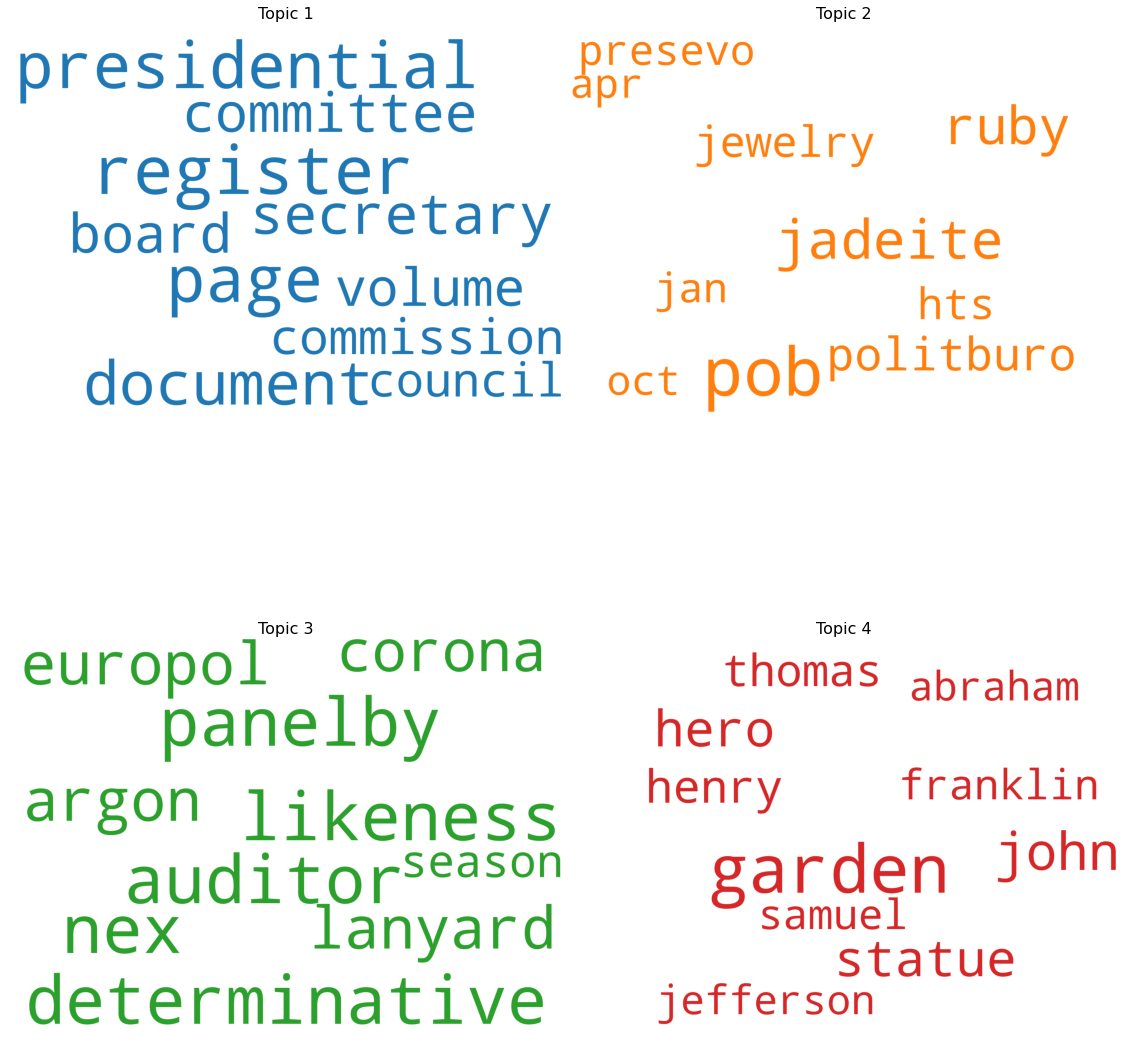

In [52]:
# Use TopicModels class to apply LDA use k = 4 initially
lda_orders = LDA_barrosoluquer(clean_orders)
lda_orders_6 = lda_orders.applyLDA(numtopics=4)
lda_orders.generate_topic_wordcloud(lda_orders_6)

In [53]:
# Run grid serach by varying hyperparams
params_grid = {
     'alpha_range':[.6,.8, 1],
     'beta_range':[.6,.8, 1],
     'num_topics_range': [4, 6, 8, 10,15,20]}
results_df = lda_orders.grid_search(params_grid)
results_df

,Models,alpha,beta,num_topics,coherence_score
58,"LdaModel(num_terms=10227, num_topics=15, decay...",1,0.8,15,0.529558
65,"LdaModel(num_terms=10227, num_topics=20, decay...",1,1,20,0.515750
89,"LdaModel(num_terms=10227, num_topics=20, decay...",asymmetric,1,20,0.503341
11,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.8,20,0.492387
41,"LdaModel(num_terms=10227, num_topics=20, decay...",0.8,1,20,0.483676
...,...,...,...,...,...
12,"LdaModel(num_terms=10227, num_topics=4, decay=...",0.6,1,4,0.372674
84,"LdaModel(num_terms=10227, num_topics=4, decay=...",asymmetric,1,4,0.371831
56,"LdaModel(num_terms=10227, num_topics=8, decay=...",1,0.8,8,0.368773
48,"LdaModel(num_terms=10227, num_topics=4, decay=...",1,0.6,4,0.364885


In [96]:
results_df.head(15)

,Models,alpha,beta,num_topics,coherence_score
58,"LdaModel(num_terms=10227, num_topics=15, decay...",1,0.8,15,0.529558
65,"LdaModel(num_terms=10227, num_topics=20, decay...",1,1,20,0.515750
89,"LdaModel(num_terms=10227, num_topics=20, decay...",asymmetric,1,20,0.503341
11,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.8,20,0.492387
41,"LdaModel(num_terms=10227, num_topics=20, decay...",0.8,1,20,0.483676
53,"LdaModel(num_terms=10227, num_topics=20, decay...",1,0.6,20,0.479098
5,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.6,20,0.469472
40,"LdaModel(num_terms=10227, num_topics=15, decay...",0.8,1,15,0.466687
16,"LdaModel(num_terms=10227, num_topics=15, decay...",0.6,1,15,0.461352
17,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,1,20,0.458905


In [102]:
six_topics = results_df.loc[91].Models

In [103]:
six_topics

In [84]:
best_model = results_df.iloc[0,0]

In [89]:
len(best_model.show_topics(formatted=False))

10

In [95]:
best_model.show_topics(num_topics=-1, formatted=False)

[(0,
  [('presidential', 0.037967995),
   ('register', 0.03701195),
   ('federal', 0.034993764),
   ('order', 0.032610163),
   ('page', 0.030825755),
   ('document', 0.026980653),
   ('president', 0.022372888),
   ('executive', 0.019652763),
   ('volume', 0.018160013),
   ('doc', 0.015538438)]),
 (1,
  [('statue', 0.0032112405),
   ('monument', 0.0030208768),
   ('american', 0.0025836576),
   ('garden', 0.0024842427),
   ('found', 0.0022861348),
   ('national', 0.0018914057),
   ('history', 0.0018329014),
   ('bond', 0.0016768248),
   ('hero', 0.0014825955),
   ('memorial', 0.0014751456)]),
 (2,
  [('shall', 0.027656155),
   ('order', 0.01992804),
   ('agency', 0.017775586),
   ('federal', 0.016280904),
   ('service', 0.012570026),
   ('law', 0.012396837),
   ('executive', 0.011448262),
   ('department', 0.010238063),
   ('government', 0.009235853),
   ('president', 0.009226454)]),
 (3,
  [('secretary', 0.026744451),
   ('state', 0.024646977),
   ('shall', 0.023072496),
   ('law', 0.01

Our optimal model produces 15 topics:

Topic 0: paperwork

Topic 1: monuments

Topic 2: bureacratic branches

Topic 3: more beureacratic branches

Topic 4: gender and military service

Topic 5: national security

Topic 6: water resources and fish

Topic 7: not sure (railroad, labor, board, employee)

Topic 8: procedural words

Topic 9: climate and environment

Topic 10: bureacracy again

Topic 11: payments

Topic 12: defense and bureaucracy

Topic 13: military procedures

Topic 14: COVID and healthcare


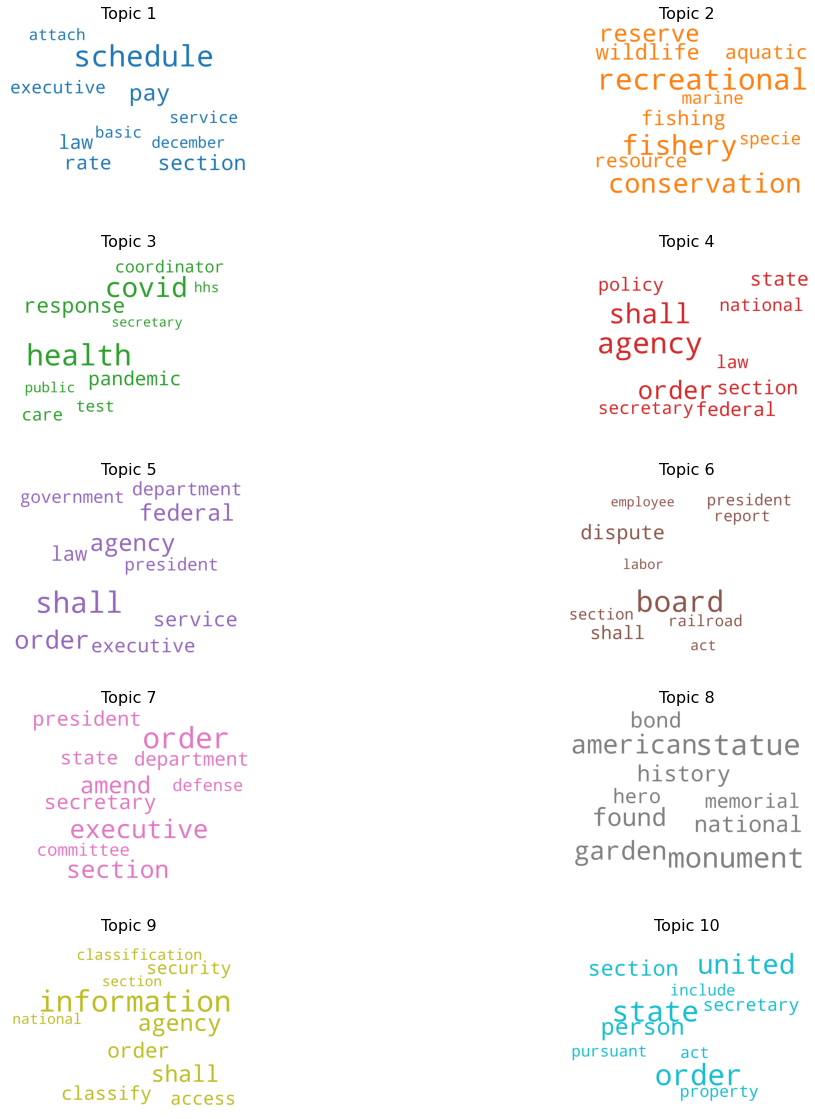

In [86]:
lda_orders.generate_topic_wordcloud(ldamodel=best_model)

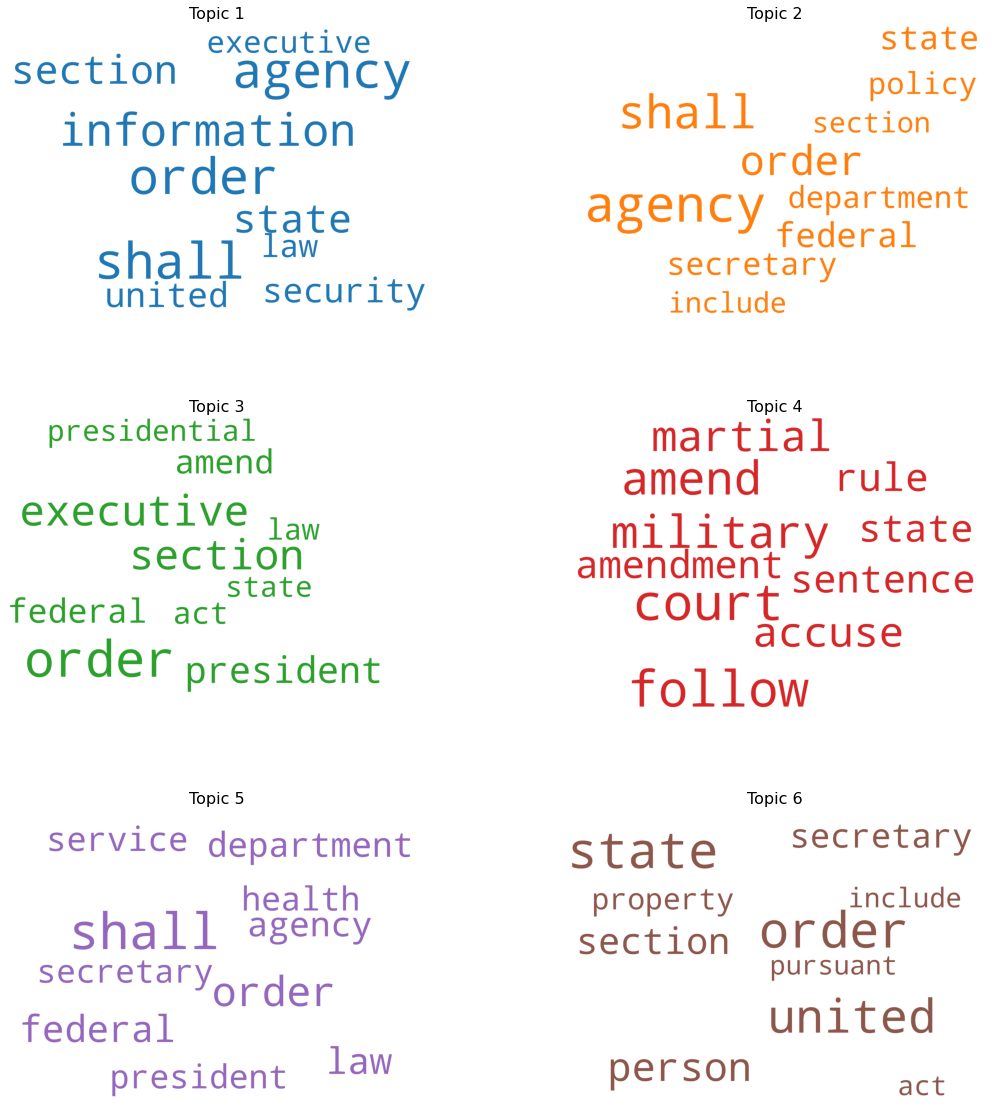

In [104]:
lda_orders.generate_topic_wordcloud(ldamodel=six_topics)

In [80]:
results_df.iloc[0]

Models             LdaModel(num_terms=10227, num_topics=15, decay...
alpha                                                              1
beta                                                             0.8
num_topics                                                        15
coherence_score                                             0.529558
Name: 58, dtype: object

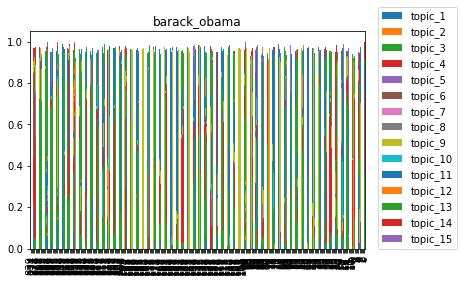

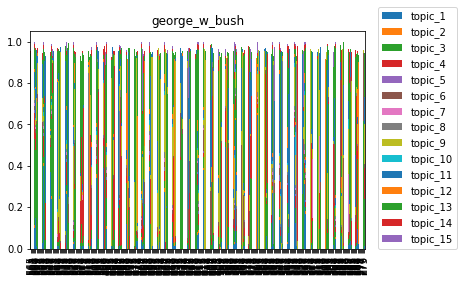

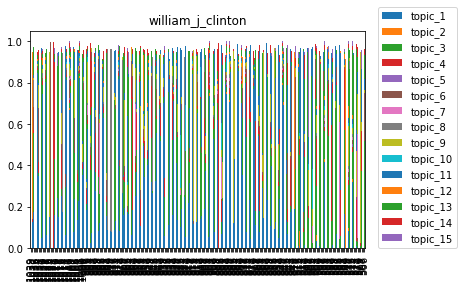

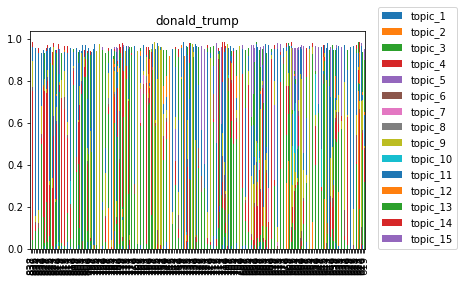

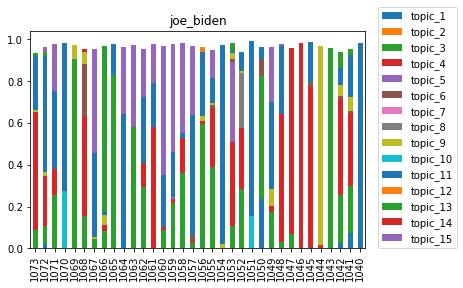

In [56]:
for president in exec_orders.president.unique():
    order_idx = exec_orders.loc[exec_orders.president == president].index.tolist()
    order_idx.reverse()
    lda_orders.generate_bar_plot(ldamodel=results_df.iloc[0,0], 
                                 docs_to_view=order_idx, title=president)

In [81]:
import random

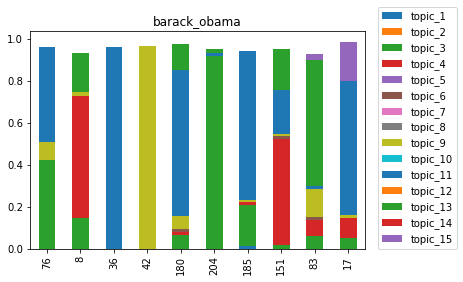

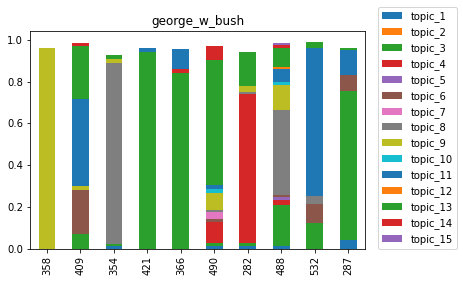

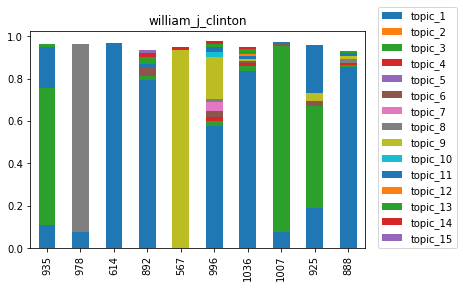

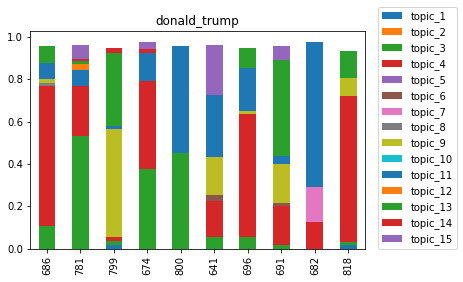

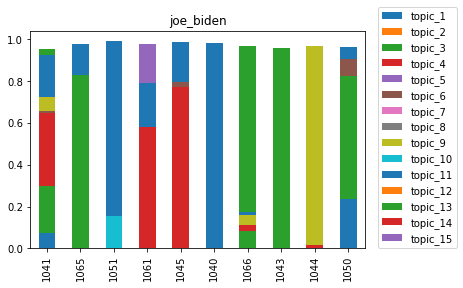

In [82]:
for president in exec_orders.president.unique():
    order_idx = exec_orders.loc[exec_orders.president == president].index.tolist()
    order_idx.reverse()
    order_idx = random.sample(order_idx, 10) # randomly sample 10 from the list to plot
    lda_orders.generate_bar_plot(ldamodel=results_df.iloc[0,0], 
                                 docs_to_view=order_idx, title=president)

In [59]:
# replication of Roberto's word embeddings but for exec orders
exec_orders.president.unique()

array(['barack_obama', 'george_w_bush', 'william_j_clinton',
       'donald_trump', 'joe_biden'], dtype=object)

In [60]:
party_affiliation = {'barack_obama': 'Democrat',
                    'george_w_bush': 'Republican',
                    'william_j_clinton': 'Democrat',
                    'donald_trump': 'Republican',
                    'joe_biden': 'Democrat'}

In [61]:
#exec_orders['tokenized_sentences'] = exec_orders['clean_text'].apply()
exec_orders['tokenized_sentences'] = exec_orders['clean_text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
exec_orders['normalized_sentences'] = exec_orders['tokenized_sentences'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [62]:
exec_orders["Party"] = exec_orders.president.apply(lambda row: party_affiliation[row])

In [63]:
democrats = exec_orders.loc[exec_orders.Party=="Democrat", :]
republicans = exec_orders.loc[exec_orders.Party=="Republican", :]

In [64]:
democratsW2V  = gensim.models.word2vec.Word2Vec(democrats['normalized_sentences'].sum(),window=10)
republicansW2V = gensim.models.word2vec.Word2Vec(republicans['normalized_sentences'].sum(),window=10)

In [65]:
words_of_interest = ["climate", "energy", "environment", "fuel",
                     "pollution", "emissions", "clean", "coal", "oil", "carbon"]

for word in words_of_interest:
    print()
    print(f"Finding words most similar to '{word}' according to its embedding")
    try:
        print("................................................................")
        print("Based on Republican embedding:")
        rep_words_tupple = republicansW2V.most_similar(word)
        rep_words = [word for word, score in rep_words_tupple]
        print(rep_words_tupple)
        sentiment = SentimentScorer.polarity_scores(" ".join(rep_words))
        print(f"Sentiment {sentiment['compound']}")
        print()
        print("Based on Democrats embedding:")
        dem_words_tupple = democratsW2V.most_similar(word)
        dem_words = [word for word, score in dem_words_tupple]
        sentiment_dem = SentimentScorer.polarity_scores(" ".join(dem_words))
        print(dem_words_tupple)
        print(f"Sentiment {sentiment_dem['compound']}")
        print()
        print()
    except:
        continue


Finding words most similar to 'climate' according to its embedding
................................................................
Based on Republican embedding:
[('conference', 0.8943452835083008), ('launch', 0.8908724784851074), ('pollution', 0.8903526067733765), ('scalable', 0.8880280256271362), ('tree', 0.8840777277946472), ('suppression', 0.8813032507896423), ('modernize', 0.8777592182159424), ('mathematics', 0.8740977048873901), ('rehabilitation', 0.8734374046325684), ('methane', 0.8698295950889587)]

Finding words most similar to 'energy' according to its embedding
................................................................
Based on Republican embedding:
[('water', 0.8207719326019287), ('forecast', 0.7985769510269165), ('transportation', 0.7932743430137634), ('infrastructure', 0.7524186372756958), ('protection', 0.7504978775978088), ('development', 0.7432593703269958), ('analysis', 0.7362589836120605), ('production', 0.7324534058570862), ('technology', 0.7274103164672852)

In [70]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [72]:
SentimentScorer = SentimentIntensityAnalyzer()


In [74]:
words_of_interest = ["climate", "energy", "environment", "fuel",
                     "pollution", "clean", "coal", "oil", "carbon"]

for word in words_of_interest:
    print()
    print(f"Finding words most similar to '{word}' according to its embedding")

    print("................................................................")
    print("Based on Republican embedding:")
    rep_words_tupple = republicansW2V.most_similar(word)
    rep_words = [word for word, score in rep_words_tupple]
    print(rep_words_tupple)
    sentiment = SentimentScorer.polarity_scores(" ".join(rep_words))
    print(f"Sentiment {sentiment['compound']}")
    print()
    print("Based on Democrats embedding:")
    dem_words_tupple = democratsW2V.most_similar(word)
    dem_words = [word for word, score in dem_words_tupple]
    sentiment_dem = SentimentScorer.polarity_scores(" ".join(dem_words))
    print(dem_words_tupple)
    print(f"Sentiment {sentiment_dem['compound']}")
    print()
    print()



Finding words most similar to 'climate' according to its embedding
................................................................
Based on Republican embedding:
[('conference', 0.8943452835083008), ('launch', 0.8908724784851074), ('pollution', 0.8903526067733765), ('scalable', 0.8880280256271362), ('tree', 0.8840777277946472), ('suppression', 0.8813032507896423), ('modernize', 0.8777592182159424), ('mathematics', 0.8740977048873901), ('rehabilitation', 0.8734374046325684), ('methane', 0.8698295950889587)]
Sentiment 0.0

Based on Democrats embedding:
[('resilience', 0.9037756323814392), ('recovery', 0.8940604329109192), ('preparedness', 0.8935171365737915), ('impact', 0.8832716941833496), ('restoration', 0.8827733993530273), ('atrocity', 0.8821969628334045), ('arctic', 0.8720663785934448), ('respond', 0.8667030930519104), ('ecosystem', 0.8601714372634888), ('ocean', 0.8590062856674194)]
Sentiment 0.0



Finding words most similar to 'energy' according to its embedding
...............

## Doc2Vec

In [105]:
exec_orders.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'citation', 'document_number', 'end_page',
       'html_url', 'pdf_url', 'type', 'subtype', 'publication_date',
       'signing_date', 'start_page', 'title', 'disposition_notes',
       'executive_order_number', 'president', 'order_text', 'clean_text',
       'tokenized_text', 'normalized_tokens', 'tokenized_sentences',
       'normalized_sentences', 'Party'],
      dtype='object')

In [106]:
keywords = ['energy', 'environment', 'education', 'labor', 'employment', 'health', 
            'healthcare', 'defense', 'security', 'war']

In [107]:
taggedDocs = []
for index, row in exec_orders.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_tokens']]
    #docKeywords.append(row['signing_date'])
    docKeywords.append(row['title']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_tokens'], tags = docKeywords))
exec_orders['TaggedOrders'] = taggedDocs

In [108]:
exec_D2V = gensim.models.doc2vec.Doc2Vec(exec_orders['TaggedOrders'], size = 100) #Limiting to 100 dimensions

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [109]:
exec_D2V.most_similar(positive = ['energy','healthcare'], negative = ['renewable'])

[('aapis', 0.7390325665473938),
 ('quality', 0.7374128699302673),
 ('era', 0.7253649234771729),
 ('creativity', 0.7147077322006226),
 ('productivity', 0.7087218761444092),
 ('care', 0.7064564824104309),
 ('sustainable', 0.6880221366882324),
 ('constrain', 0.6865764856338501),
 ('rural', 0.6828758120536804),
 ('medicaid', 0.681040346622467)]

In [111]:
exec_D2V.most_similar(positive = ['cut','increase'], negative = ['tax'])

[('drive', 0.8394268751144409),
 ('continuously', 0.839030385017395),
 ('wildland', 0.8367905616760254),
 ('deployment', 0.8238936066627502),
 ('sustainable', 0.815136194229126),
 ('entrepreneur', 0.8052852153778076),
 ('enterprise', 0.7951325178146362),
 ('scalable', 0.779407799243927),
 ('productivity', 0.7790278196334839),
 ('locally', 0.776972770690918)]

In [112]:
sklearn.metrics.pairwise.cosine_similarity(exec_D2V['committee'].reshape(1,-1), exec_D2V['board'].reshape(1,-1))

array([[0.58093625]], dtype=float32)

In [113]:
exec_D2V.docvecs.most_similar([exec_D2V['energy'] ], topn=5 )

[('Federal Leadership in Environmental, Energy, and Economic Performance',
  0.6493438482284546),
 ("Promoting Active Management of America's Forests, Rangelands, and Other Federal Lands To Improve Conditions and Reduce Wildfire Risk",
  0.6395925879478455),
 ('Strengthening Surface Transportation Security', 0.626785397529602),
 ('Greening the Government Through Efficient Energy Management',
  0.591312050819397),
 ('energy', 0.551226019859314)]

In [114]:
exec_D2V.docvecs.most_similar([exec_D2V['job'] ], topn=5 )

[('Access to Affordable Life-Saving Medications', 0.6769315004348755),
 ('Building the National Garden of American Heroes', 0.659661054611206),
 ('Amendment to Executive Order 13125, Increasing Participation of Asian Americans and Pacific Islanders in Federal Programs',
  0.65581214427948),
 ('Exemption From Executive Order 13658 for Recreational Services on Federal Lands',
  0.6527481079101562),
 ('Federal Workforce Transportation', 0.6330221891403198)]

In [115]:
exec_D2V.docvecs.most_similar([exec_D2V['medicare'] ], topn=5 )

[('Access to Affordable Life-Saving Medications', 0.8631265759468079),
 ('An America-First Healthcare Plan', 0.8220252990722656),
 ('Lowering Prices for Patients by Eliminating Kickbacks to Middlemen',
  0.8165398836135864),
 ('Reforming Our Incarceration System To Eliminate the Use of Privately Operated Criminal Detention Facilities',
  0.7563331127166748),
 ('Advancing American Kidney Health', 0.748867392539978)]

In [116]:
exec_D2V.most_similar([exec_D2V.docvecs['Access to Affordable Life-Saving Medications']], topn=5)

[('epinephrine', 0.9319689273834229),
 ('price', 0.8956791162490845),
 ('low', 0.8886064291000366),
 ('injectable', 0.8707404136657715),
 ('medicare', 0.8631266355514526)]

In [117]:
exec_D2V.most_similar([exec_D2V.docvecs['A Federal Strategy To Ensure Secure and Reliable Supplies of Critical Minerals']], topn=5)

[('creativity', 0.7915143966674805),
 ('lake', 0.7416248321533203),
 ('impact', 0.7295975089073181),
 ('rebuild', 0.7244806289672852),
 ('sustainable', 0.7208640575408936)]

In [118]:
exec_D2V.docvecs.most_similar([exec_D2V['land']+exec_D2V['protect']+exec_D2V['water'] ], topn=5 )

[('Encouraging International Support for the Recovery and Use of Space Resources',
  0.7656775712966919),
 ("Promoting Active Management of America's Forests, Rangelands, and Other Federal Lands To Improve Conditions and Reduce Wildfire Risk",
  0.7625375390052795),
 ('Trails for America in the 21st Century', 0.7213295698165894),
 ('Management and General Public Use of the National Wildlife Refuge System',
  0.721288800239563),
 ('Gulf Coast Ecosystem Restoration', 0.6190264225006104)]

In [119]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = exec_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, exec_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

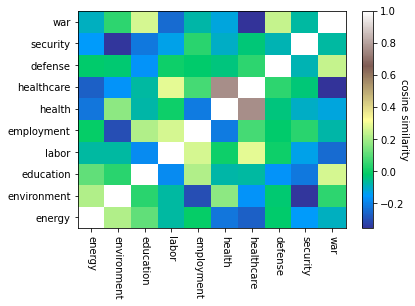

In [120]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [121]:
targetDocs = exec_orders['title'].sample(10, random_state=1)

In [122]:
heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = exec_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, exec_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

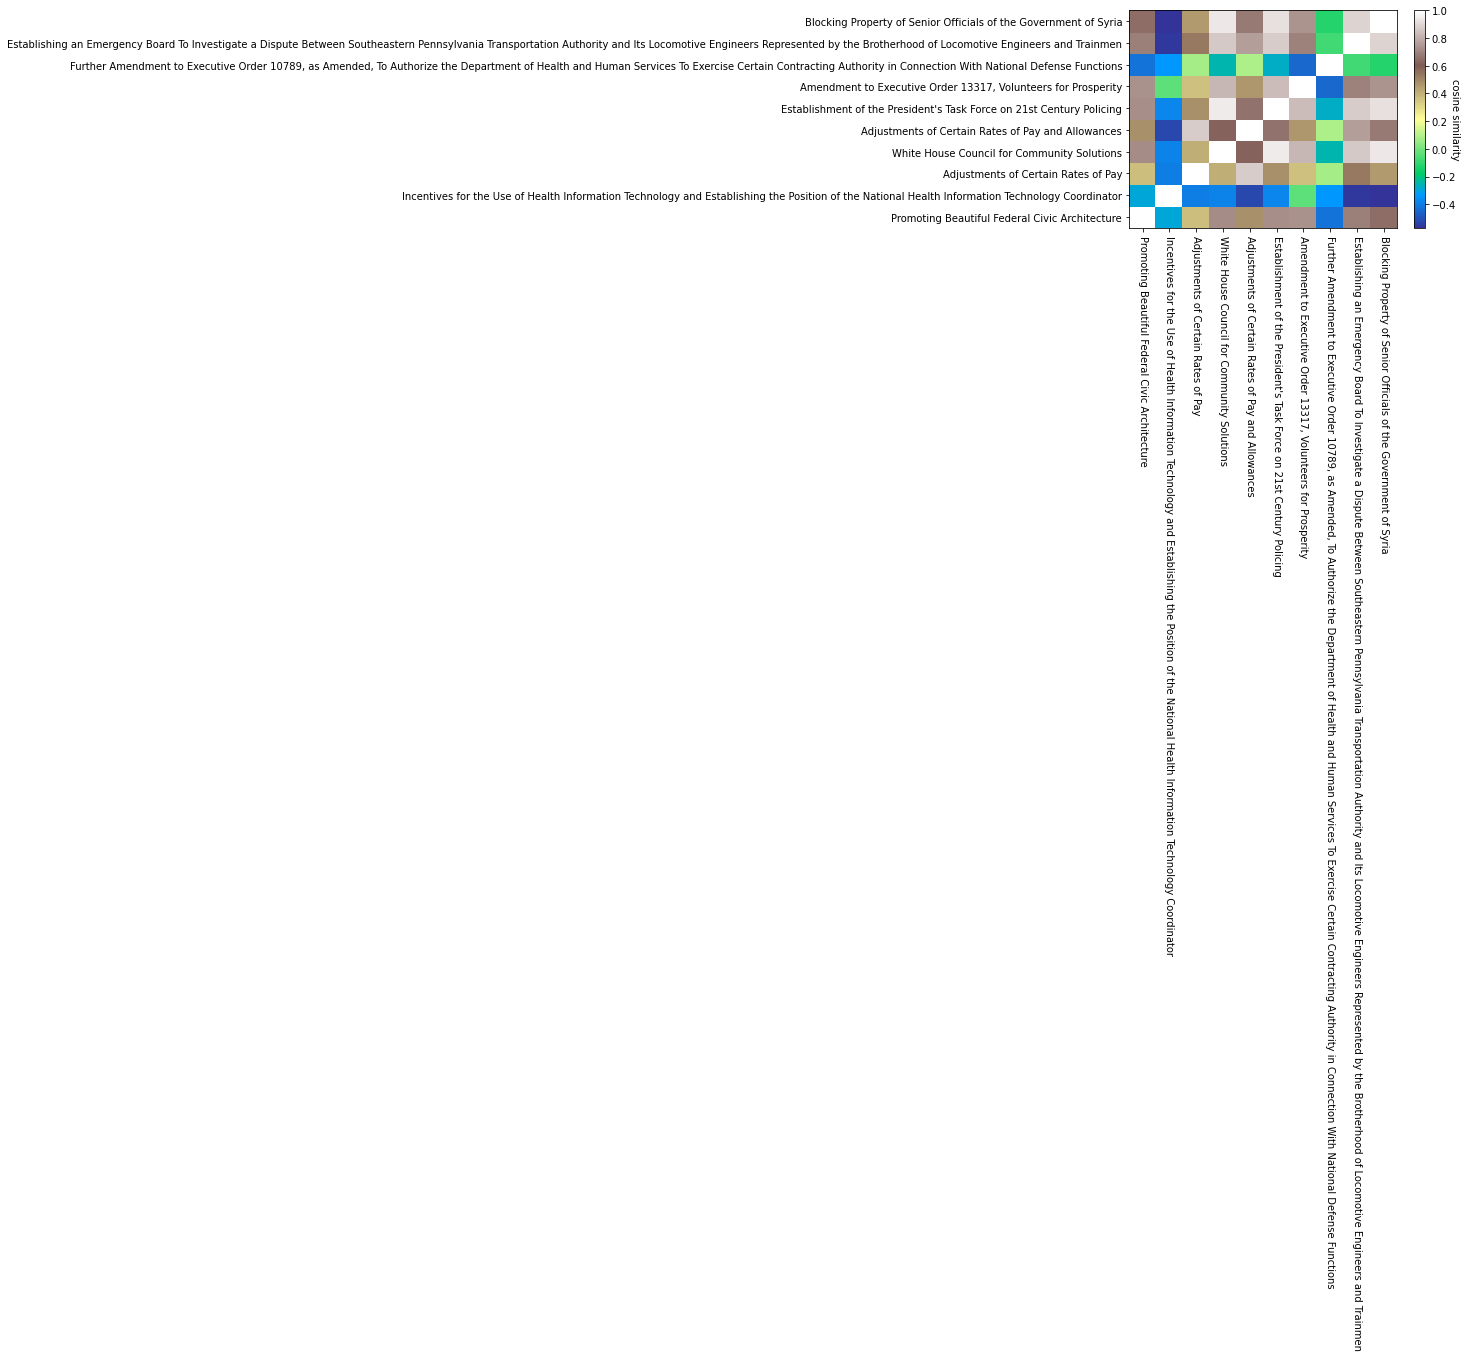

In [123]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [124]:
# heatmap of similarity between those 10 random docs and my keywords
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = exec_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, exec_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

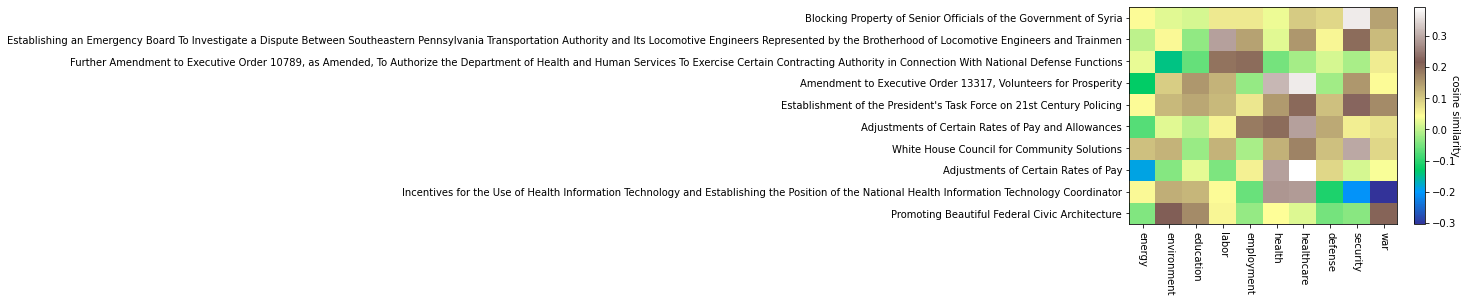

In [125]:
fig, ax = plt.subplots()
#fig = plt.figure(figsize = (20,12))
#ax = fig.add_subplot(111)
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [126]:
exec_D2V.save('exec_D2V')

In [128]:
exec_orders.disposition_notes

0       Amends: EO 13467, June 30, 2008; EO 13488, Jan...
1       Revokes: EO 13557, November 4, 2010\nRevoked b...
2                      Revokes: EO 13737, August 12, 2016
3       Revokes in part: EO 13067, November 3, 1997\nR...
4                        Amends: EO 11016, April 25, 1962
                              ...                        
1069                                                  NaN
1070                                                  NaN
1071                                                  NaN
1072                                                  NaN
1073                                                  NaN
Name: disposition_notes, Length: 1074, dtype: object